**INSTALL MODUL**

In [2]:
%pip install regex
%pip install scikeras
%pip install langdetect
%pip install spacy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [3]:
%pip install mlxtend
%pip install scikit-learn
%pip install seaborn
%pip install tensorflow
%pip install keras

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**IMPORT MODUL**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# from wordcloud import WordCloud
import nltk
import spacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# from wordcloud import WordCloud
import nltk
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import nltk

nltk.download('punkt_tab')
nltk.download('punkt')



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rizki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rizki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**SCRAPPING WEB GOODREADS**

In [5]:
import requests
from bs4 import BeautifulSoup
import csv
import time

urls = [
    "https://www.goodreads.com/book/show/2452401.Teatro_Grottesco",
    "https://www.goodreads.com/book/show/42372424-the-laws-of-the-skies",
    "https://www.goodreads.com/book/show/20893407-the-lesser-dead",
    "https://www.goodreads.com/book/show/35356382-the-chalk-man",
    "https://www.goodreads.com/book/show/51160099-thirteen-storeys",
    "https://www.goodreads.com/book/show/12341557-the-wind-through-the-keyhole",
    "https://www.goodreads.com/book/show/472966.The_Vampyre",
    "https://www.goodreads.com/book/show/6572.Suffer_the_Children",
    "https://www.goodreads.com/book/show/11806716-blackout",
    "https://www.goodreads.com/book/show/18667769-the-merciless",
    "https://www.goodreads.com/book/show/31341.Blood_And_Gold",
    "https://www.goodreads.com/book/show/30065.The_Walking_Dead_Vol_5",
    "https://www.goodreads.com/book/show/16057298-north-american-lake-monsters",
    "https://www.goodreads.com/book/show/45890523-starve-acre",
    "https://www.goodreads.com/book/show/53329253-echo",
    "https://www.goodreads.com/book/show/31343.Pandora",
    "https://www.goodreads.com/book/show/63213.The_Dunwich_Horror_and_Others",
    "https://www.goodreads.com/book/show/3978.A_Winter_Haunting",
    "https://www.goodreads.com/book/show/8779896-the-monkey-s-paw",
    "https://www.goodreads.com/book/show/63264519-dead-of-winter",
    "https://www.goodreads.com/book/show/239065.The_Descent",
    "https://www.goodreads.com/book/show/291950.Books_of_Blood_Volume_Two",
    "https://www.goodreads.com/book/show/10577.Roadwork",
    "https://www.goodreads.com/book/show/62919399-nineteen-claws-and-a-black-bird",
    "https://www.goodreads.com/book/show/891472.The_Summer_I_Died",
    "https://www.goodreads.com/book/show/10577.Roadwork",
    "https://www.goodreads.com/book/show/202795132-la-riada",
    "https://www.goodreads.com/book/show/219362.Legion",
    "https://www.goodreads.com/book/show/145152.The_Cellar",
    "https://www.goodreads.com/book/show/58371432-the-book-of-cold-cases",
    "https://www.goodreads.com/book/show/6465707-the-walking-dead",
    "https://www.goodreads.com/book/show/8051458-the-reapers-are-the-angels",
    "https://www.goodreads.com/book/show/49081449-venus-in-the-blind-spot",
    "https://www.goodreads.com/book/show/911954.The_Imago_Sequence_and_Other_Stories",
    "https://www.goodreads.com/book/show/59093587-patricia-wants-to-cuddle",
    "https://www.goodreads.com/book/show/38922230-ghost-wall",
    "https://www.goodreads.com/book/show/693172.Twilight_Eyes",
    "https://www.goodreads.com/book/show/24040551-the-night-sister",
    "https://www.goodreads.com/book/show/31776292-frankenstein",
    "https://www.goodreads.com/book/show/32828538-lost-boy",
    "https://www.goodreads.com/book/show/23308488-chilling-adventures-of-sabrina-vol-1",
    "https://www.goodreads.com/book/show/308540.The_Haunted_Mask",
    "https://www.goodreads.com/book/show/1137702.The_Wendigo",
    "https://www.goodreads.com/book/show/39325105-harrow-the-ninth",
    "https://www.goodreads.com/book/show/125542.Stay_Out_of_the_Basement",
    "https://www.goodreads.com/book/show/10618.Apt_Pupil",
    "https://www.goodreads.com/book/show/64948.Whispers",
    "https://www.goodreads.com/book/show/13030260-the-devil-in-silver",
    "https://www.goodreads.com/book/show/33574090-what-the-hell-did-i-just-read",
    "https://www.goodreads.com/book/show/46041168-hurricane-season",
    "https://www.goodreads.com/book/show/38458438-the-houseguest-and-other-stories",
    "https://www.goodreads.com/book/show/13542949-your-house-is-on-fire-your-children-all-gone",
    "https://www.goodreads.com/book/show/10129880-the-colour-out-of-space",
    "https://www.goodreads.com/book/show/45685.The_Canterville_Ghost",
    "https://www.goodreads.com/book/show/60708721-it-came-from-the-closet",
    "https://www.goodreads.com/book/show/10511555-dracula-s-guest",
    "https://www.goodreads.com/book/show/21570066-bones-all",
    "https://www.goodreads.com/book/show/8957.Tunnels_of_Blood",
    "https://www.goodreads.com/book/show/196848553-the-house-that-horror-built",
    "https://www.goodreads.com/book/show/58502336-the-nice-house-on-the-lake-vol-1",
    "https://www.goodreads.com/book/show/51610977-voices-in-the-snow",
    "https://www.goodreads.com/book/show/43317482-in-the-dream-house",
    "https://www.goodreads.com/book/show/28233096-the-silver-eyes",
    "https://www.goodreads.com/book/show/6420846-lockdown",
    "https://www.goodreads.com/book/show/228204.Demon_Seed",
    "https://www.goodreads.com/book/show/204294824-sleep-tight",
    "https://www.goodreads.com/book/show/18782854-the-supernatural-enhancements",
    "https://www.goodreads.com/book/show/207611566-witchcraft-for-wayward-girls",
    "https://www.goodreads.com/book/show/55711279-something-is-killing-the-children-vol-3",
    "https://www.goodreads.com/book/show/16299.And_Then_There_Were_None",
    "https://www.goodreads.com/book/show/18453110-the-three",
    "https://www.goodreads.com/book/show/6739080-hater",
    "https://www.goodreads.com/book/show/397861.The_Dark",
    "https://www.goodreads.com/book/show/57147078-deserter",
    "https://www.goodreads.com/book/show/11550.Usher_s_Passing",
    "https://www.goodreads.com/book/show/397872.Lair",
    "https://www.goodreads.com/book/show/477801.Let_s_Go_Play_at_the_Adams_",
    "https://www.goodreads.com/book/show/14059024-the-whispering-skull",
    "https://www.goodreads.com/book/show/25365.Out",
    "https://www.goodreads.com/book/show/49183687-harrow-lake",
    "https://www.goodreads.com/book/show/18748653-daughters-unto-devils",
    "https://www.goodreads.com/book/show/53869658-secret-santa",
    "https://www.goodreads.com/book/show/52102795-dear-laura",
    "https://www.goodreads.com/book/show/49770175-camp-slaughter",
    "https://www.goodreads.com/book/show/58763686-haunting-adeline",
    "https://www.goodreads.com/book/show/28870482-the-haunting-of-blackwood-house",
    "https://www.goodreads.com/book/show/61317867-tombs",
    "https://www.goodreads.com/book/show/20344877-we-are-all-completely-fine",
    "https://www.goodreads.com/book/show/10822174-the-walking-dead-vol-14",
    "https://www.goodreads.com/book/show/40495148-blindness",
    "https://www.goodreads.com/book/show/32703.The_Diary_of_Ellen_Rimbauer",
    "https://www.goodreads.com/book/show/201646.The_Woods_Are_Dark",
    "https://www.goodreads.com/book/show/16435.Life_Expectancy",
    "https://www.goodreads.com/book/show/7507908-the-replacement",
    "https://www.goodreads.com/book/show/195945770-in-bloom",
    "https://www.goodreads.com/book/show/40091283-the-hiding-place",
    "https://www.goodreads.com/book/show/15799400-the-resurrectionist"

]

with open('goodreads_books4.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Title", "Author", "Link", "Sinopsis"])

    for url in urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        title_tag = soup.find('h1', class_='Text Text__title1', attrs={'data-testid': 'bookTitle'})
        title = title_tag.text.strip() if title_tag else "Title not found"

        author_tag = soup.find('span', class_='ContributorLink__name', attrs={'data-testid': 'name'})
        author = author_tag.text.strip() if author_tag else "Author not found"

        sinopsis_tag = soup.find('span', class_='Formatted')
        sinopsis = sinopsis_tag.text.strip() if sinopsis_tag else "Sinopsis not found"

        writer.writerow([title, author, url, sinopsis])
        print(f"Title: {title}, Author: {author}, Link: {url}, Sinopsis: {sinopsis}")

        time.sleep(1)

Title: Teatro Grottesco, Author: Thomas Ligotti, Link: https://www.goodreads.com/book/show/2452401.Teatro_Grottesco, Sinopsis: This collection features tormented individuals who play out their doom in various odd little towns, as well as in dark sectors frequented by sinister and often blackly comical eccentrics. The cycle of narratives that includes the title work of this collection, for instance, introduces readers to a freakish community of artists who encounter demonic perils that ultimately engulf their lives. These are selected examples of the forbidding array of persons and places that compose the mesmerizing fiction of Thomas Ligotti.
Title: The Laws of the Skies, Author: Grégoire Courtois, Link: https://www.goodreads.com/book/show/42372424-the-laws-of-the-skies, Sinopsis: Twelve six-year-olds and their three adult chaperones head into the woods on a camping trip. None of them make it out alive.The Laws of the Skies follows the terrified children as they scatter into the night 

**DATA CLEANING DATASET GENRE ROMANTIS**

In [6]:
import pandas as pd
import re

def bersihkan_teks(teks):
    teks_bersih = re.sub(r'[^a-zA-Z0-9\s.,!?()-]', '', str(teks))
    teks_bersih = ' '.join(teks_bersih.split())
    return teks_bersih

try:
    df = pd.read_csv(
        "/content/romance_clean.csv",
        sep=';',
        quotechar='"',
        escapechar='\\',
        on_bad_lines='skip',
        engine='python'
    )

    print("Nama kolom dalam dataset:")
    print(df.columns.tolist())

    if len(df.columns) == 1:
        df = pd.read_csv(
            "/content/romance_clean.csv",
            sep=',',
            quotechar='"',
            escapechar='\\',
            on_bad_lines='skip',
            engine='python',
            header=None
        )
        df.columns = ['Title', 'Author', 'Link', 'Sinopsis', 'Genre']

    df_awal = df.copy()
    jumlah_awal = len(df)
    print(f"\nJumlah baris awal: {jumlah_awal}")

    df = df[df['Sinopsis'].notna()]
    df = df[df['Sinopsis'].str.strip() != '']
    df = df[df['Genre'] != 'Genre not found']
    df['Sinopsis'] = df['Sinopsis'].apply(bersihkan_teks)
    df = df.drop_duplicates(subset='Sinopsis', keep='first')
    data_dihapus = df_awal[~df_awal.index.isin(df.index)]
    jumlah_akhir = len(df)
    jumlah_dihapus = jumlah_awal - jumlah_akhir

    print(f"\nJumlah baris yang dihapus: {jumlah_dihapus}")
    print(f"Jumlah baris yang tersisa: {jumlah_akhir}")
    print("\nSampel data yang dihapus:")
    print(data_dihapus.head())
    df.to_csv("romancee_clean.csv", index=False, sep=',')
    print("\nData yang telah dibersihkan disimpan ke 'romancee_clean.csv'")

except Exception as e:
    print(f"Terjadi kesalahan: {str(e)}")


Terjadi kesalahan: [Errno 2] No such file or directory: '/content/romance_clean.csv'


**DATA CLEANING DATASET GENRE FIKSI**

In [7]:
import pandas as pd
import re

def bersihkan_teks(teks):
    teks_bersih = re.sub(r'[^a-zA-Z0-9\s.,!?()-]', '', str(teks))
    teks_bersih = ' '.join(teks_bersih.split())
    return teks_bersih

try:
    df = pd.read_csv(
        "/content/fiction_clean.csv",
        sep=';',
        quotechar='"',
        escapechar='\\',
        on_bad_lines='skip',
        engine='python'
    )

    print("Nama kolom dalam dataset:")
    print(df.columns.tolist())

    if len(df.columns) == 1:
        df = pd.read_csv(
            "/content/fiction_clean.csv",
            sep=',',
            quotechar='"',
            escapechar='\\',
            on_bad_lines='skip',
            engine='python',
            header=None
        )
        df.columns = ['Title', 'Author', 'Link', 'Sinopsis', 'Genre']

    df_awal = df.copy()
    jumlah_awal = len(df)
    print(f"\nJumlah baris awal: {jumlah_awal}")

    df = df[df['Sinopsis'].notna()]
    df = df[df['Sinopsis'].str.strip() != '']
    df = df[df['Genre'] != 'Genre not found']
    df['Sinopsis'] = df['Sinopsis'].apply(bersihkan_teks)
    df = df.drop_duplicates(subset='Sinopsis', keep='first')
    data_dihapus = df_awal[~df_awal.index.isin(df.index)]
    jumlah_akhir = len(df)
    jumlah_dihapus = jumlah_awal - jumlah_akhir

    print(f"\nJumlah baris yang dihapus: {jumlah_dihapus}")
    print(f"Jumlah baris yang tersisa: {jumlah_akhir}")
    print("\nSampel data yang dihapus:")
    print(data_dihapus.head())
    df.to_csv("fictionn_clean.csv", index=False, sep=',')
    print("\nData yang telah dibersihkan disimpan ke 'fictionn_clean.csv'")

except Exception as e:
    print(f"Terjadi kesalahan: {str(e)}")


Terjadi kesalahan: [Errno 2] No such file or directory: '/content/fiction_clean.csv'


**DATA CLEANING DATASET GENRE POLITIK**

In [8]:
import pandas as pd
import re

def bersihkan_teks(teks):
    teks_bersih = re.sub(r'[^a-zA-Z0-9\s.,!?()-]', '', str(teks))
    teks_bersih = ' '.join(teks_bersih.split())
    return teks_bersih

try:
    df = pd.read_csv(
        "/content/political_clean.csv",
        sep=';',
        quotechar='"',
        escapechar='\\',
        on_bad_lines='skip',
        engine='python'
    )

    if len(df.columns) == 1:
        df = pd.read_csv(
            "/content/political_clean.csv",
            sep=',',
            quotechar='"',
            escapechar='\\',
            on_bad_lines='skip',
            engine='python',
            header=None
        )
        df.columns = ['Title', 'Author', 'Link', 'Sinopsis', 'Genre']

    df_awal = df.copy()

    jumlah_awal = len(df)

    df = df[df['Sinopsis'].notna()]
    df = df[df['Sinopsis'].str.strip() != '']
    df = df[df['Genre'] != 'Genre not found']
    df['Sinopsis'] = df['Sinopsis'].apply(bersihkan_teks)
    df = df.drop_duplicates(subset='Sinopsis', keep='first')

    data_dihapus = df_awal[~df_awal.index.isin(df.index)]

    jumlah_akhir = len(df)
    jumlah_dihapus = jumlah_awal - jumlah_akhir

    print(f"Jumlah baris yang dihapus: {jumlah_dihapus}")
    print(f"Jumlah baris yang tersisa: {jumlah_akhir}")
    print("Sampel data yang dihapus:")
    print(data_dihapus.head())

    df.to_csv("politicall_clean.csv", index=False, sep=',')

except Exception as e:
    print(f"Terjadi kesalahan: {str(e)}")


Terjadi kesalahan: [Errno 2] No such file or directory: '/content/political_clean.csv'


**DATA CLEANING DATASET GENRE NON FIKSI**

In [9]:
import pandas as pd
import re

def bersihkan_teks(teks):
    teks_bersih = re.sub(r'[^a-zA-Z0-9\s.,!?()-]', '', str(teks))
    teks_bersih = ' '.join(teks_bersih.split())
    return teks_bersih

try:
    df = pd.read_csv(
        "/content/nonfiction_clean.csv",
        sep=';',
        quotechar='"',
        escapechar='\\',
        on_bad_lines='skip',
        engine='python'
    )

    if len(df.columns) == 1:
        df = pd.read_csv(
            "/content/nonfiction_clean.csv",
            sep=',',
            quotechar='"',
            escapechar='\\',
            on_bad_lines='skip',
            engine='python',
            header=None
        )
        df.columns = ['Title', 'Author', 'Link', 'Sinopsis', 'Genre']

    df_awal = df.copy()

    jumlah_awal = len(df)

    df = df[df['Sinopsis'].notna()]
    df = df[df['Sinopsis'].str.strip() != '']
    df = df[df['Genre'] != 'Genre not found']
    df['Sinopsis'] = df['Sinopsis'].apply(bersihkan_teks)
    df = df.drop_duplicates(subset='Sinopsis', keep='first')

    data_dihapus = df_awal[~df_awal.index.isin(df.index)]

    jumlah_akhir = len(df)
    jumlah_dihapus = jumlah_awal - jumlah_akhir

    print(f"Jumlah baris yang dihapus: {jumlah_dihapus}")
    print(f"Jumlah baris yang tersisa: {jumlah_akhir}")
    print("Sampel data yang dihapus:")
    print(data_dihapus.head())

    df.to_csv("nonfictionn_clean.csv", index=False, sep=',')

    print("Data yang telah dibersihkan disimpan ke 'nonfictionn_clean.csv'")

except Exception as e:
    print(f"Terjadi kesalahan: {str(e)}")


Terjadi kesalahan: [Errno 2] No such file or directory: '/content/nonfiction_clean.csv'


**DATA CLEANING DATASET GENRE RELIGI**

In [10]:
import pandas as pd
import re

def bersihkan_teks(teks):
    teks_bersih = re.sub(r'[^a-zA-Z0-9\s.,!?()-]', '', str(teks))
    teks_bersih = ' '.join(teks_bersih.split())
    return teks_bersih

try:
    df = pd.read_csv(
        "/content/religi_clean.csv",
        sep=';',
        quotechar='"',
        escapechar='\\',
        on_bad_lines='skip',
        engine='python'
    )

    if len(df.columns) == 1:
        df = pd.read_csv(
            "/content/religi_clean.csv",
            sep=',',
            quotechar='"',
            escapechar='\\',
            on_bad_lines='skip',
            engine='python',
            header=None
        )
        df.columns = ['Title', 'Author', 'Link', 'Sinopsis', 'Genre']

    df_awal = df.copy()
    jumlah_awal = len(df)

    df = df[df['Sinopsis'].notna()]
    df = df[df['Sinopsis'].str.strip() != '']
    df = df[df['Genre'] != 'Genre not found']
    df['Sinopsis'] = df['Sinopsis'].apply(bersihkan_teks)
    df = df.drop_duplicates(subset='Sinopsis', keep='first')

    data_dihapus = df_awal[~df_awal.index.isin(df.index)]
    jumlah_akhir = len(df)
    jumlah_dihapus = jumlah_awal - jumlah_akhir

    print(f"Jumlah baris yang dihapus: {jumlah_dihapus}")
    print(f"Jumlah baris yang tersisa: {jumlah_akhir}")
    print("Sampel data yang dihapus:")
    print(data_dihapus.head())

    df.to_csv("religionn_clean.csv", index=False, sep=',')

    print("Data yang telah dibersihkan disimpan ke 'religionn_clean.csv'")

except Exception as e:
    print(f"Terjadi kesalahan: {str(e)}")


Terjadi kesalahan: [Errno 2] No such file or directory: '/content/religi_clean.csv'


**DATA CLEANING (6 GENRE DIJADIKAN 1 DATASET) (Remove NaN, Genre not found, Sinopsis duplikat, Sinopsis not in english)**


In [11]:
import pandas as pd
import re

def bersihkan_teks(teks):
    teks_bersih = re.sub(r'[^a-zA-Z0-9\s.,!?()-]', '', str(teks))
    teks_bersih = ' '.join(teks_bersih.split())
    return teks_bersih

try:
    df = pd.read_csv(
        "/content/data full power.csv",
        sep=';',
        quotechar='"',
        escapechar='\\',
        on_bad_lines='skip',
        engine='python'
    )

    print("Nama kolom dalam dataset:")
    print(df.columns.tolist())

    if len(df.columns) == 1:
        df = pd.read_csv(
            "/content/data full power.csv",
            sep=',',
            quotechar='"',
            escapechar='\\',
            on_bad_lines='skip',
            engine='python',
            header=None
        )
        df.columns = ['Title', 'Author', 'Link', 'Sinopsis', 'Genre']

    df_awal = df.copy()
    data_nan = df[df['Sinopsis'].isna() | df['Sinopsis'].str.strip().eq('')]
    df = df.drop(data_nan.index)
    data_genre_not_found = df[df['Genre'] == 'Genre not found']
    df = df.drop(data_genre_not_found.index)
    df['Sinopsis'] = df['Sinopsis'].apply(bersihkan_teks)
    data_duplikat = df[df.duplicated(subset='Sinopsis', keep='first')]
    df = df.drop(data_duplikat.index)
    jumlah_awal = len(df_awal)
    jumlah_akhir = len(df)
    jumlah_dihapus = jumlah_awal - jumlah_akhir

    print(f"\nJumlah baris awal: {jumlah_awal}")
    print(f"Jumlah baris akhir: {jumlah_akhir}")
    print(f"Jumlah baris yang dihapus: {jumlah_dihapus}")

    print("\nData yang dihapus karena NaN atau kosong:")
    print(data_nan.head())
    print("\nData yang dihapus karena genre 'Genre not found':")
    print(data_genre_not_found.head())
    print("\nData yang dihapus karena duplikat:")
    print(data_duplikat.head())

    if not data_nan.empty:
        data_nan.to_csv("data_dihapus_nan.csv", index=False, sep=',')
    if not data_genre_not_found.empty:
        data_genre_not_found.to_csv("data_dihapus_genre_not_found.csv", index=False, sep=',')
    if not data_duplikat.empty:
        data_duplikat.to_csv("data_dihapus_duplikat.csv", index=False, sep=',')
    df.to_csv("DATA FULL.csv", index=False, sep=',')
    print("\nData yang telah dibersihkan disimpan ke 'DATA FULL.csv'")

except Exception as e:
    print(f"Terjadi kesalahan: {str(e)}")


Terjadi kesalahan: [Errno 2] No such file or directory: '/content/data full power.csv'


In [12]:
import pandas as pd
from langdetect import detect

try:
    df = pd.read_csv('DATA FULL (gabungan 6 genre).csv', encoding='utf-8', engine='python', sep=None, on_bad_lines='skip')
except Exception as e:
    print(f"Error membaca file: {e}")
    print("Mencoba metode alternatif...")
    df = pd.read_csv('DATA FULL (gabungan 6 genre).csv', encoding='utf-8', engine='python', sep=None)

print("Kolom yang tersedia:")
print(df.columns)

if 'Sinopsis' in df.columns:
    sinopsis_column = 'Sinopsis'
elif 'sinopsis' in df.columns:
    sinopsis_column = 'sinopsis'
else:
    raise ValueError("Kolom Sinopsis tidak ditemukan dalam dataset")

df = df.dropna(subset=[sinopsis_column])

def is_english(text):
    try:
        return detect(str(text)) == 'en'
    except:
        return False

df_english = df[df[sinopsis_column].apply(is_english)]
df_non_english = df[~df[sinopsis_column].apply(is_english)]

df_english.to_csv('data_clean_english.csv', index=False, encoding='utf-8')

df_non_english.to_csv('data_non_english.csv', index=False, encoding='utf-8')

print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data berbahasa Inggris: {len(df_english)}")
print(f"Jumlah data yang dihapus (bukan bahasa Inggris): {len(df_non_english)}")

print("\nContoh data yang dihapus:")
print(df_non_english.head())


Error membaca file: [Errno 2] No such file or directory: 'DATA FULL (gabungan 6 genre).csv'
Mencoba metode alternatif...


FileNotFoundError: [Errno 2] No such file or directory: 'DATA FULL (gabungan 6 genre).csv'

**LOWERCASING**

In [3]:
import pandas as pd

try:
    df = pd.read_csv('data_clean_english.csv', encoding='utf-8')
except Exception as e:
    print(f"Error membaca file: {e}")
    print("Mencoba metode alternatif...")
    df = pd.read_csv('data_clean_english.csv', encoding='utf-8', engine='python', sep=None)

print("Kolom yang tersedia:")
print(df.columns)

sinopsis_column = 'Sinopsis' if 'Sinopsis' in df.columns else 'sinopsis'

if sinopsis_column not in df.columns:
    raise ValueError("Kolom Sinopsis tidak ditemukan dalam dataset")

df = df.dropna(subset=[sinopsis_column])
df[sinopsis_column] = df[sinopsis_column].str.lower()
df.to_csv('data_clean_english_lowercase.csv', index=False, encoding='utf-8')
print(f"Jumlah data awal: {len(df)}")
print(f"Data berhasil disimpan ke 'data_clean_english_lowercase.csv'")


Kolom yang tersedia:
Index(['Title', 'Author', 'Link', 'Sinopsis', 'Genre'], dtype='object')
Jumlah data awal: 5533
Data berhasil disimpan ke 'data_clean_english_lowercase.csv'


In [4]:
import pandas as pd
file_path = "data_clean_english_lowercase.csv"
df = pd.read_csv(file_path)
df.head()


,Title,Author,Link,Sinopsis,Genre
0,1984,George Orwell,https://www.goodreads.com/book/show/61439040-1984,a masterpiece of rebellion and imprisonment wh...,Fiction
1,To Kill a Mockingbird,Harper Lee,https://www.goodreads.com/book/show/2657.To_Ki...,the unforgettable novel of a childhood in a sl...,Fiction
2,The Great Gatsby,F. Scott Fitzgerald,https://www.goodreads.com/book/show/4671.The_G...,"the great gatsby, f. scott fitzgeralds third b...",Fiction
3,Animal Farm,George Orwell,https://www.goodreads.com/book/show/170448.Ani...,librarians note there is an alternate cover ed...,Fiction
4,The Catcher in the Rye,J.D. Salinger,https://www.goodreads.com/book/show/5107.The_C...,its christmas time and holden caulfield has ju...,Fiction


**REMOVE PUNCTUATION EXCEPT (,) TITIK**

In [3]:
import pandas as pd
import re

df = pd.read_csv('data_clean_english_lowercase.csv', encoding='utf-8')

if 'Sinopsis' not in df.columns:
    raise ValueError("Kolom 'Sinopsis' tidak ditemukan dalam dataset!")

def bersihkan_teks(teks):
    teks = re.sub(r'[^\w\s.]', '', teks)
    teks = re.sub(r'\.{2,}', '.', teks)
    teks = teks.strip()
    return teks

df['Sinopsis_Bersih'] = df['Sinopsis'].apply(bersihkan_teks)
df.to_csv('data_cleaned.csv', index=False, encoding='utf-8')
print(df[['Sinopsis', 'Sinopsis_Bersih']].head())


                                            Sinopsis  \
0  a masterpiece of rebellion and imprisonment wh...   
1  the unforgettable novel of a childhood in a sl...   
2  the great gatsby, f. scott fitzgeralds third b...   
3  librarians note there is an alternate cover ed...   
4  its christmas time and holden caulfield has ju...   

                                     Sinopsis_Bersih  
0  a masterpiece of rebellion and imprisonment wh...  
1  the unforgettable novel of a childhood in a sl...  
2  the great gatsby f. scott fitzgeralds third bo...  
3  librarians note there is an alternate cover ed...  
4  its christmas time and holden caulfield has ju...  


**TOKENISASI**

In [4]:
from nltk.tokenize import word_tokenize

def tokenize(teks):
    return word_tokenize(teks)

df['Tokenisasi'] = df['Sinopsis_Bersih'].apply(tokenize)
df.to_csv('data_with_tokenization.csv', index=False, encoding='utf-8')
print(df[['Sinopsis', 'Tokenisasi']].head())


                                            Sinopsis  \
0  a masterpiece of rebellion and imprisonment wh...   
1  the unforgettable novel of a childhood in a sl...   
2  the great gatsby, f. scott fitzgeralds third b...   
3  librarians note there is an alternate cover ed...   
4  its christmas time and holden caulfield has ju...   

                                          Tokenisasi  
0  [a, masterpiece, of, rebellion, and, imprisonm...  
1  [the, unforgettable, novel, of, a, childhood, ...  
2  [the, great, gatsby, f., scott, fitzgeralds, t...  
3  [librarians, note, there, is, an, alternate, c...  
4  [its, christmas, time, and, holden, caulfield,...  


**STOPWORDS**

In [5]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def hapus_stopwords(token_list):
    return [token for token in token_list if token.lower() not in stop_words]

df['Tanpa_Stopwords'] = df['Tokenisasi'].apply(hapus_stopwords)
df.to_csv('data_without_stopwords.csv', index=False, encoding='utf-8')
print(df[['Sinopsis', 'Tanpa_Stopwords']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shoba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            Sinopsis  \
0  a masterpiece of rebellion and imprisonment wh...   
1  the unforgettable novel of a childhood in a sl...   
2  the great gatsby, f. scott fitzgeralds third b...   
3  librarians note there is an alternate cover ed...   
4  its christmas time and holden caulfield has ju...   

                                     Tanpa_Stopwords  
0  [masterpiece, rebellion, imprisonment, war, pe...  
1  [unforgettable, novel, childhood, sleepy, sout...  
2  [great, gatsby, f., scott, fitzgeralds, third,...  
3  [librarians, note, alternate, cover, edition, ...  
4  [christmas, time, holden, caulfield, expelled,...  


**LEMATISASI**

In [8]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Jika menggunakan WordNet modern

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shoba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shoba\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatizeText(token_list):
    return [lemmatizer.lemmatize(token) for token in token_list]

df['Lematisasi'] = df['Tanpa_Stopwords'].apply(lemmatizeText)
df.to_csv('data_with_lemmatization.csv', index=False, encoding='utf-8')
print(df[['Sinopsis', 'Lematisasi']].head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shoba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                            Sinopsis  \
0  a masterpiece of rebellion and imprisonment wh...   
1  the unforgettable novel of a childhood in a sl...   
2  the great gatsby, f. scott fitzgeralds third b...   
3  librarians note there is an alternate cover ed...   
4  its christmas time and holden caulfield has ju...   

                                          Lematisasi  
0  [masterpiece, rebellion, imprisonment, war, pe...  
1  [unforgettable, novel, childhood, sleepy, sout...  
2  [great, gatsby, f., scott, fitzgerald, third, ...  
3  [librarian, note, alternate, cover, edition, e...  
4  [christmas, time, holden, caulfield, expelled,...  


**FEATURE EXTRACTION MENGGUNAKAN TF IDF**

In [7]:
%pip install keras
%pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install keras.preprocessing.text

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.preprocessing.text (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.text


In [12]:

df = pd.read_csv('data_with_lemmatization.csv', encoding='utf-8')


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),  # Menggunakan unigram dan bigram
    sublinear_tf=True  # Sublinear scaling pada term frequency
)


X = df['Lematisasi']
y = df['Genre']

X_tfidf = tfidf.fit_transform(X).toarray()

pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out()).to_csv('data_with_tfidf.csv', index=False, encoding='utf-8')


**TRAINING AND VALIDATION**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

LinearSVC(random_state=42)

**AKURASI**

In [16]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_model.predict(X_val)

print(f'Akurasi: {accuracy_score(y_val, y_pred):.2f}')

print(classification_report(y_val, y_pred))


Akurasi: 0.76
              precision    recall  f1-score   support

     Fiction       0.70      0.61      0.65       216
      Horror       0.76      0.82      0.79       167
    Nonfiksi       0.73      0.69      0.71       204
   Political       0.77      0.81      0.79       155
    Religion       0.87      0.81      0.84       188
     Romance       0.73      0.86      0.79       177

    accuracy                           0.76      1107
   macro avg       0.76      0.77      0.76      1107
weighted avg       0.76      0.76      0.76      1107



**CONFUSSION MATRIX**

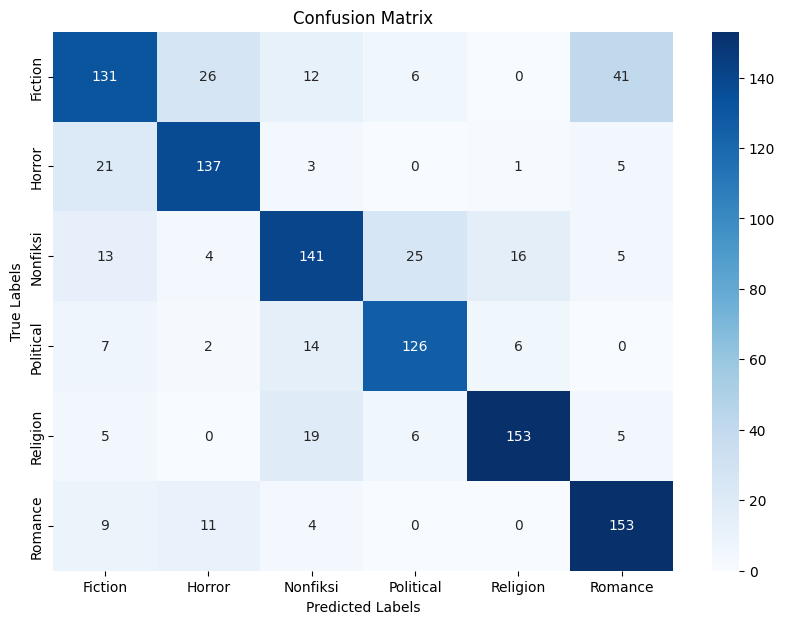

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)

class_labels = sorted(set(y_train) | set(y_val))
if len(class_labels) != len(svm_model.classes_):
    class_labels = svm_model.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [15]:
import pickle

In [18]:
from joblib import dump

# Simpan model SVM dan vectorizer ke dalam format Joblib
dump(svm_model, 'svm_model(RBF).joblib')
dump(tfidf, 'tfidf_vectorizer.joblib')

print("Model dan vectorizer berhasil disimpan dalam format Joblib!")


Model dan vectorizer berhasil disimpan dalam format Joblib!


In [19]:
from joblib import load

svm_model = load('svm_model(RBF).joblib')
tfidf = load('tfidf_vectorizer.joblib')

print("Model dan vectorizer berhasil dimuat dari file Joblib!")


Model dan vectorizer berhasil dimuat dari file Joblib!


In [22]:
from preprosesing import Preprocessor

# Inisialisasi preprocessor
preprocessor = Preprocessor(sinopsis_column='Sinopsis')

# Data baru
data_baru = pd.DataFrame({'Sinopsis': ["""No religion in the modern world is as feared and misunderstood as Islam. It haunts the popular Western imagination as an extreme faith that promotes authoritarian government, female oppression, civil war, and terrorism. Karen Armstrong's short history offers a vital corrective to this narrow view. The distillation of years of thinking and writing about Islam, it demonstrates that the world's fastest-growing faith is a much richer and more complex phenomenon than its modern fundamentalist strain might suggest.

Islam: A Short History begins with the flight of Muhammad and his family from Medina in the seventh century and the subsequent founding of the first mosques. It recounts the origins of the split between Shii and Sunni Muslims, and the emergence of Sufi mysticism; the spread of Islam throughout North Africa, the Levant, and Asia; the shattering effect on the Muslim world of the Crusades; the flowering of imperial Islam in the fourteenth and fifteenth centuries into the world's greatest and most sophisticated power; and the origins and impact of revolutionary Islam. It concludes with an assessment of Islam today and its challenges.

With this brilliant book, Karen Armstrong issues a forceful challenge to those who hold the view that the West and Islam are civilizations set on a collision course. It is also a model of authority, elegance, and economy."""]})

# Preprocessing data baru
data_baru_processed = preprocessor.preprocess_dataframe(data_baru)

# Prediksi dengan model
sinopsis_tfidf = tfidf.transform(data_baru_processed['Lemmatized'].apply(' '.join))
sinopsis_dense = sinopsis_tfidf.toarray()  # Ubah sparse matrix menjadi dense array
prediksi = svm_model.predict(sinopsis_dense)

print(f"Genre yang diprediksi: {prediksi[0]}")
data_baru_processed['Lemmatized']



Genre yang diprediksi: Religion


0    [religion, modern, world, feared, misunderstoo...
Name: Lemmatized, dtype: object